In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [71]:
import pandas as pd

# Euro 2024 verisi
euro_df = pd.read_csv('/content/drive/MyDrive/DSA210/Euro_2024_Matches.csv')

# Süper Lig verisi
super_lig_df = pd.read_csv('/content/drive/MyDrive/DSA210/2023_2024_super_lig_statistics.csv', sep=';')

# İlk satırlara göz at
print("Euro 2024 :")
print(euro_df.head())

print("\nSüper Lig :")
print(super_lig_df.head())


Euro 2024 :
                 stadium attendance home_team    away_team  home_goals  \
0    Fuball Arena Mnchen     65,052   Germany     Scotland           5   
1        Cologne Stadium     41,676   Hungary  Switzerland           1   
2  Olympiastadion Berlin     68,844     Spain      Croatia           3   
3   BVB Stadion Dortmund     60,512     Italy      Albania           2   
4       Volksparkstadion     48,117    Poland  Netherlands           1   

   away_goals  Home Expected goals(xG)  Home Total shots  \
0           1                     2.15                20   
1           3                     1.25                 6   
2           0                     2.01                11   
3           1                     1.56                17   
4           2                     1.32                12   

   Home Shots on target  Home Big chances  ...  Away Red cards  \
0                    10                 1  ...               1   
1                     2                 3  ...    

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [43]:
# Select required columns
x = super_lig_df['encounters_in_opponent_box']
y = super_lig_df['expected_goals_xg']


In [44]:
# Pearson verilerinin varlığını ve p-değerini hesabıyla
r_value, p_value = pearsonr(x, y)

print(f"📈 Pearson r: {r_value:.2f}")
print(f"📊 p-value: {p_value:.5f}")

# Comment
if p_value < 0.05:
    print("✅ Sonuç: Anlamlı bir ilişki var (H₀ reddedilir)")
else:
    print("❌ Sonuç: Anlamlı bir ilişki yok (H₀ reddedilemez)")


📈 Pearson r: 0.96
📊 p-value: 0.00000
✅ Sonuç: Anlamlı bir ilişki var (H₀ reddedilir)


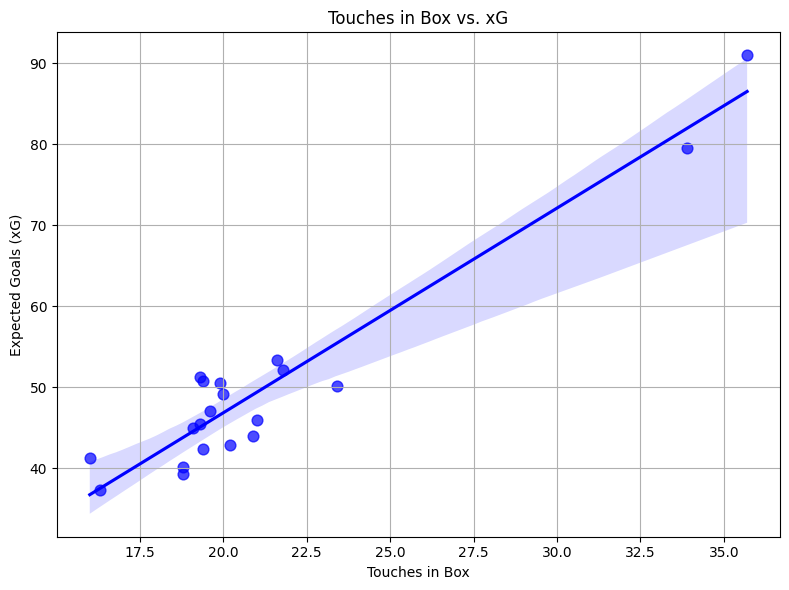

In [45]:
plt.figure(figsize=(8,6))
sns.regplot(x=x, y=y, color='blue', scatter_kws={'s': 60, 'alpha': 0.7})
plt.xlabel('Touches in Box')
plt.ylabel('Expected Goals (xG)')
plt.title('Touches in Box vs. xG')
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
# For Home team DataFrame
home_df = euro_df[['home_team', 'Home Touches in opposition box', 'Home Expected goals (xG)']].copy()
home_df.columns = ['Team', 'box_touches', 'xG']

# For Away team DataFrame
away_df = euro_df[['away_team', 'Away Touches in opposition box', 'Away Expected goals (xG)']].copy()
away_df.columns = ['Team', 'box_touches', 'xG']

# Combination of two of them
combined_df = pd.concat([home_df, away_df], ignore_index=True)

In [82]:
from scipy.stats import pearsonr

x = combined_df['box_touches']
y = combined_df['xG']

r_value, p_value = pearsonr(x, y)

print(f"📈 Pearson r: {r_value:.2f}")
print(f"📊 p-value: {p_value:.5f}")

if p_value < 0.05:
    print("✅ There is a significant relationship (H₀ is rejected)")
else:
    print("❌ There is no significant relationship (H₀ is not rejected)")


📈 Pearson r: 0.67
📊 p-value: 0.00000
✅ There is a significant relationship (H₀ is rejected)


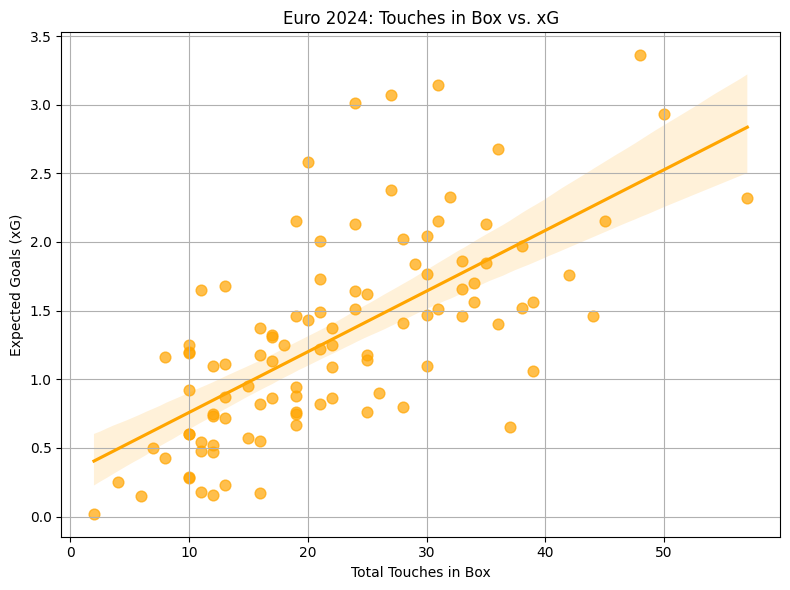

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.regplot(x='box_touches', y='xG', data=combined_df, scatter_kws={'s': 60, 'alpha': 0.7}, color='orange')
plt.xlabel('Total Touches in Box')
plt.ylabel('Expected Goals (xG)')
plt.title('Euro 2024: Touches in Box vs. xG')
plt.grid(True)
plt.tight_layout()
plt.show()


In [84]:
# Tüm kolonları küçük harfe çevirip filtrele
for col in euro_df.columns:
    if 'pass' in col.lower():
        print(col)


Home Accurate passes
Home Passes
Home Accurate passes.1
Away Accurate passes
Away Passes
Away Accurate passes.1


In [85]:
## Home data
home = euro_df[['home_team',
                'Home Touches in opposition box',
                'Home Expected goals (xG)',
                'Home Accurate passes']].copy()
home.columns = ['Team', 'box_touches', 'xG', 'accurate_passes']

# Away data
away = euro_df[['away_team',
                'Away Touches in opposition box',
                'Away Expected goals (xG)',
                'Away Accurate passes']].copy()
away.columns = ['Team', 'box_touches', 'xG', 'accurate_passes']

# combine
combined_df = pd.concat([home, away], ignore_index=True)
combined_df.head()


,Team,box_touches,xG,accurate_passes
0,Germany,31,2.15,643(94%)
1,Hungary,10,1.25,643(94%)
2,Spain,21,2.01,365(83%)
3,Italy,34,1.56,365(83%)
4,Poland,17,1.32,383(84%)


In [86]:
# Yeni iki sütun oluşturmak için regex ile ayır
combined_df[['accurate_passes', 'accurate_passes_ratio']] = combined_df['accurate_passes'].astype(str).str.extract(r'(\d+)\((\d+)%\)')

# Sayısal veri tipine çevir
combined_df['accurate_passes'] = combined_df['accurate_passes'].astype(float)
combined_df['accurate_passes_ratio'] = combined_df['accurate_passes_ratio'].astype(float)
combined_df['xG'] = combined_df['xG'].astype(float)



In [87]:
from scipy.stats import pearsonr

# Korelasyon hesapla
r_value, p_value = pearsonr(combined_df['accurate_passes'], combined_df['xG'])

# Sonuçları yazdır
print(f"🧠 Pearson r (xG vs Accurate Passes): {r_value:.2f}")
print(f"📊 p-value: {p_value:.5f}")

if p_value < 0.05:
    print("✅ There is a significant relationship between xG and Accurate Passes  (H₀ is rejected)")
else:
    print("❌ There is no significant relationship between xG and Accurate Passes (H₀ is not rejected)")


🧠 Pearson r (xG vs Accurate Passes): -0.17
📊 p-value: 0.08812
❌ There is no significant relationship between xG and Accurate Passes (H₀ is not rejected)


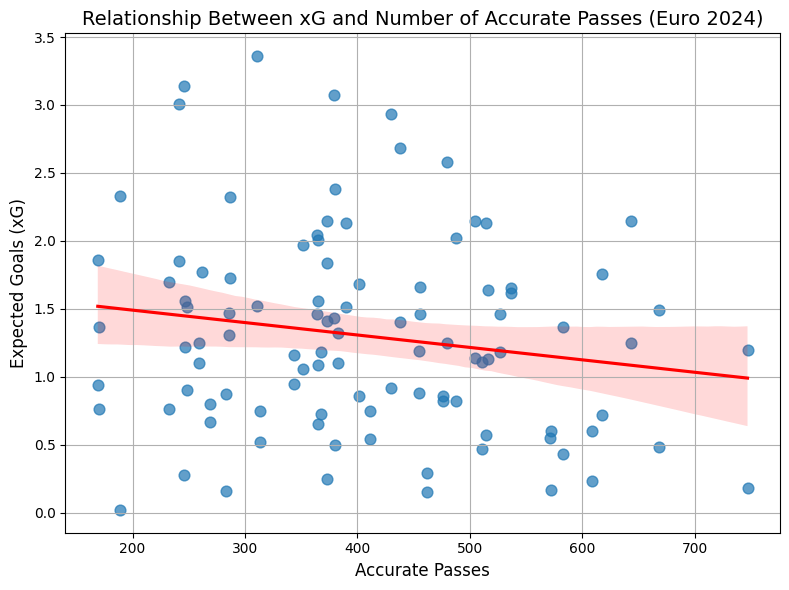

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(
    x='accurate_passes',
    y='xG',
    data=combined_df,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)

plt.xlabel('Accurate Passes', fontsize=12)
plt.ylabel('Expected Goals (xG)', fontsize=12)
plt.title('Relationship Between xG and Number of Accurate Passes (Euro 2024)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [89]:
print(combined_df[['accurate_passes', 'xG']].describe())
print(combined_df[['accurate_passes', 'xG']].isna().sum())


       accurate_passes          xG
count       102.000000  102.000000
mean        404.892157    1.303235
std         135.337415    0.728759
min         169.000000    0.020000
25%         287.000000    0.760000
50%         381.500000    1.235000
75%         505.000000    1.695000
max         747.000000    3.360000
accurate_passes    0
xG                 0
dtype: int64


In [90]:
# Home takımlar
home = euro_df[['home_team', 'Home Touches in opposition box', 'Home Expected goals (xG)', 'Home Accurate passes']].copy()
home.columns = ['Team', 'box_touches', 'xG', 'accurate_passes']

# Away takımlar
away = euro_df[['away_team', 'Away Touches in opposition box', 'Away Expected goals (xG)', 'Away Accurate passes']].copy()
away.columns = ['Team', 'box_touches', 'xG', 'accurate_passes']

# Birleştir
combined_df = pd.concat([home, away], ignore_index=True)


In [91]:
# accurate_passes kolonunu ikiye ayır: sayı ve yüzde
combined_df[['accurate_passes', 'accurate_passes_ratio']] = combined_df['accurate_passes'].astype(str).str.extract(r'(\d+)\((\d+)%\)')

# Float'a çevir
combined_df['accurate_passes'] = combined_df['accurate_passes'].astype(float)
combined_df['accurate_passes_ratio'] = combined_df['accurate_passes_ratio'].astype(float)


In [92]:
# xG kolonunu düzgün float formata çevir
combined_df['xG'] = combined_df['xG'].astype(str).str.replace(',', '.').str.extract(r'(\d+\.?\d*)')[0]
combined_df['xG'] = combined_df['xG'].astype(float)


In [93]:
r, p = pearsonr(combined_df['accurate_passes'], combined_df['xG'])

print(f"📈 Pearson r: {r:.2f}")
print(f"📊 p-value: {p:.5f}")

if p < 0.05:
    print("✅ Anlamlı ilişki var (H₀ reddedilir)")
else:
    print("❌ Anlamlı ilişki yok (H₀ reddedilemez)")


📈 Pearson r: -0.17
📊 p-value: 0.08812
❌ Anlamlı ilişki yok (H₀ reddedilemez)


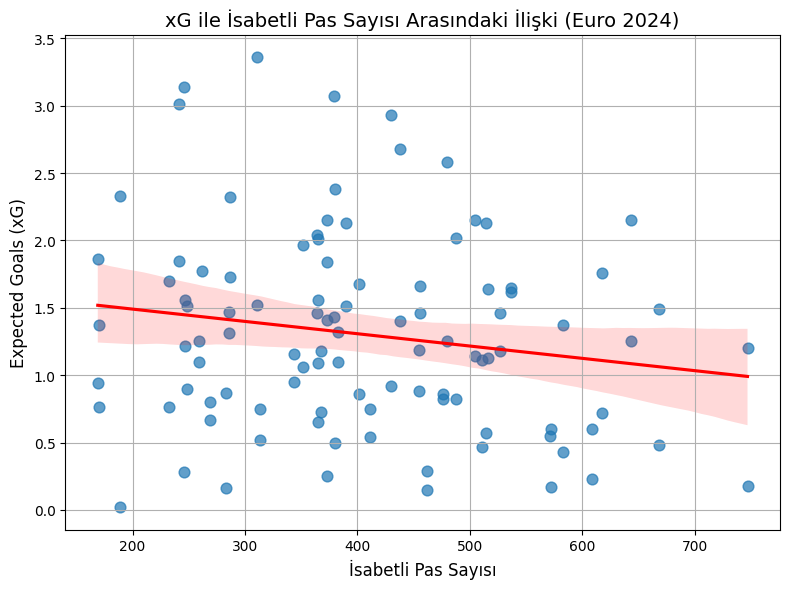

In [94]:
plt.figure(figsize=(8,6))
sns.regplot(
    x='accurate_passes',
    y='xG',
    data=combined_df.dropna(subset=['accurate_passes', 'xG']),
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)

plt.xlabel('İsabetli Pas Sayısı', fontsize=12)
plt.ylabel('Expected Goals (xG)', fontsize=12)
plt.title('xG ile İsabetli Pas Sayısı Arasındaki İlişki (Euro 2024)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [95]:
# Home
home = euro_df[['home_team', 'Home Accurate passes', 'Home Non-penalty xG']].copy()
home.columns = ['Team', 'accurate_passes_raw', 'open_play_xG']

# Away
away = euro_df[['away_team', 'Away Accurate passes', 'Away Non-penalty xG']].copy()
away.columns = ['Team', 'accurate_passes_raw', 'open_play_xG']

# Birleştir
combined_open = pd.concat([home, away], ignore_index=True)


In [96]:
# "643(94%)" → "94"
combined_open['accurate_passes_ratio'] = combined_open['accurate_passes_raw'].astype(str).str.extract(r'\d+\((\d+)%\)')
combined_open['accurate_passes_ratio'] = combined_open['accurate_passes_ratio'].astype(float)


In [97]:
from scipy.stats import pearsonr

r, p = pearsonr(combined_open['accurate_passes_ratio'], combined_open['open_play_xG'])

print(f"📈 Pearson r: {r:.2f}")
print(f"📊 p-value: {p:.5f}")

if p < 0.05:
    print("✅ Anlamlı ilişki var (H₀ reddedilir)")
else:
    print("❌ Anlamlı ilişki yok (H₀ reddedilemez)")


📈 Pearson r: -0.14
📊 p-value: 0.15560
❌ Anlamlı ilişki yok (H₀ reddedilemez)


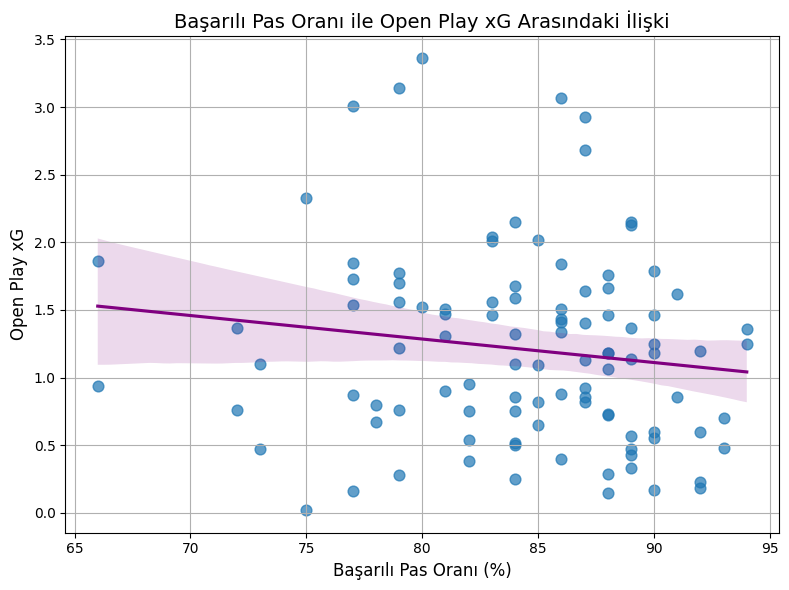

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.regplot(
    x='accurate_passes_ratio',
    y='open_play_xG',
    data=combined_open.dropna(),
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'purple'}
)

plt.xlabel('Başarılı Pas Oranı (%)', fontsize=12)
plt.ylabel('Open Play xG', fontsize=12)
plt.title('Başarılı Pas Oranı ile Open Play xG Arasındaki İlişki', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


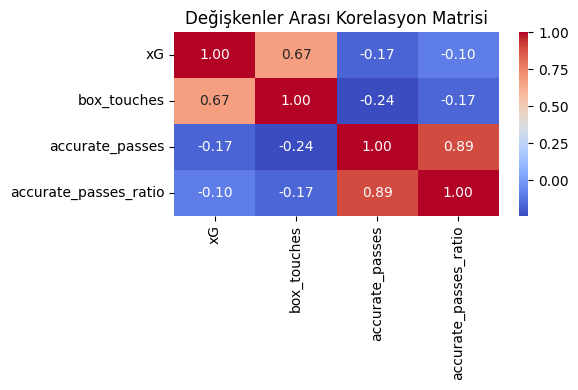

In [99]:
# Select the required numeric columns for the correlation matrix.
corr_df = combined_df[['xG', 'box_touches', 'accurate_passes', 'accurate_passes_ratio']]
corr = corr_df.corr()

# Vizualation
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.tight_layout()
plt.show()


In [100]:
# Convert possession percentage to float
super_lig_df['possession_percentage'] = (
    super_lig_df['possession_percentage']
    .astype(str)
    .str.replace(',', '.')
    .str.extract(r'(\d+\.?\d*)')[0]
    .astype(float)
)

# Convert box encounters to float
super_lig_df['encounters_in_opponent_box'] = (
    super_lig_df['encounters_in_opponent_box']
    .astype(str)
    .str.extract(r'(\d+)')[0]
    .astype(float)
)


In [101]:
r, p = pearsonr(
    super_lig_df['possession_percentage'],
    super_lig_df['encounters_in_opponent_box']
)

print(f"📈 Pearson r: {r:.2f}")
print(f"📊 p-value: {p:.5f}")

if p < 0.05:
    print("✅ Statistically significant correlation found (reject H₀)")
else:
    print("❌ No statistically significant correlation (fail to reject H₀)")


📈 Pearson r: 0.76
📊 p-value: 0.00010
✅ Statistically significant correlation found (reject H₀)


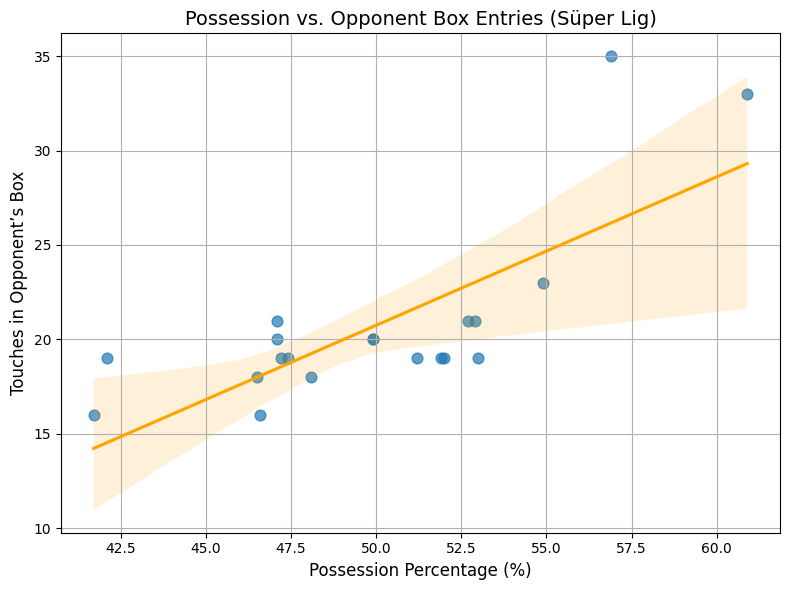

In [102]:
plt.figure(figsize=(8,6))
sns.regplot(
    x='possession_percentage',
    y='encounters_in_opponent_box',
    data=super_lig_df,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'orange'}
)

plt.xlabel('Possession Percentage (%)', fontsize=12)
plt.ylabel('Touches in Opponent’s Box', fontsize=12)
plt.title('Possession vs. Opponent Box Entries (Süper Lig)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


🔹 Open Play xG vs Pass Accuracy: r = -0.17, p = 0.07858
🔹 Set Piece xG vs Pass Accuracy: r = 0.03, p = 0.79185


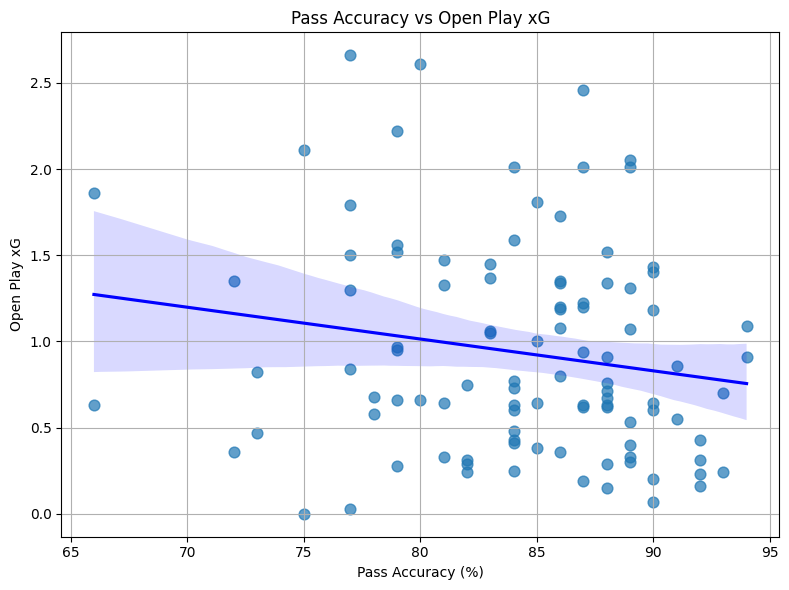

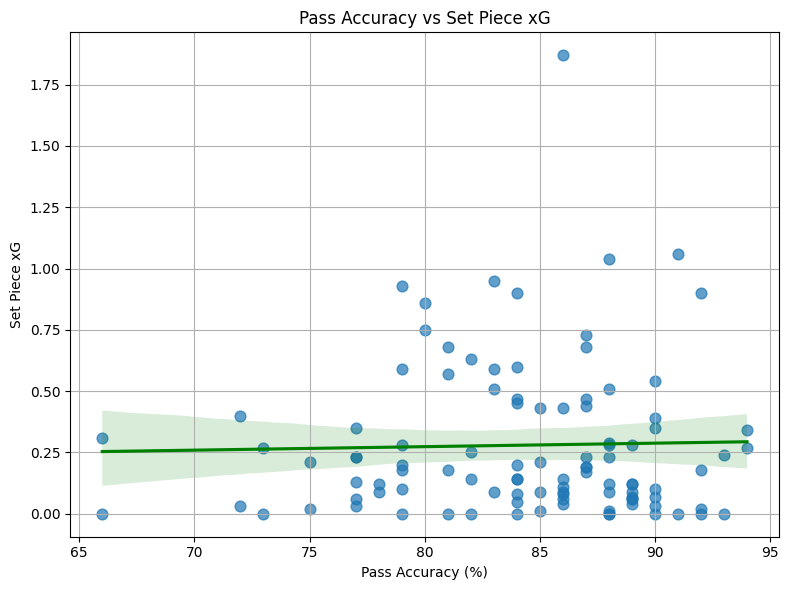

In [115]:
# --- PASS ACCURACY vs OPEN / SET PIECE xG ANALYSIS ---

# 1. Prepare home and away dataframes
home = euro_df[[
    'home_team', 'Home Passes', 'Home Accurate passes',
    'Home xG open play', 'Home xG set play'
]].copy()

away = euro_df[[
    'away_team', 'Away Passes', 'Away Accurate passes',
    'Away xG open play', 'Away xG set play'
]].copy()

# 2. Rename columns for uniformity
home.columns = ['Team', 'total_passes', 'accurate_passes_raw', 'open_play_xG', 'set_piece_xG']
away.columns = ['Team', 'total_passes', 'accurate_passes_raw', 'open_play_xG', 'set_piece_xG']

# 3. Combine home and away
combined_df = pd.concat([home, away], ignore_index=True)

# 4. Clean numeric values
for col in ['total_passes', 'open_play_xG', 'set_piece_xG']:
    combined_df[col] = (
        combined_df[col]
        .astype(str)
        .str.replace(',', '.')
        .str.extract(r'(\d+\.?\d*)')[0]
        .astype(float)
    )

# 5. Extract accurate_passes and pass_accuracy from combined string like "643(94%)"
combined_df[['accurate_passes', 'pass_accuracy']] = (
    combined_df['accurate_passes_raw']
    .astype(str)
    .str.extract(r'(\d+)\((\d+)%\)')
    .astype(float)
)

# 6. Correlation analysis
from scipy.stats import pearsonr

r_open, p_open = pearsonr(combined_df['pass_accuracy'], combined_df['open_play_xG'])
r_set, p_set = pearsonr(combined_df['pass_accuracy'], combined_df['set_piece_xG'])

print(f"🔹 Open Play xG vs Pass Accuracy: r = {r_open:.2f}, p = {p_open:.5f}")
print(f"🔹 Set Piece xG vs Pass Accuracy: r = {r_set:.2f}, p = {p_set:.5f}")

# 7. Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Open play xG graph
plt.figure(figsize=(8, 6))
sns.regplot(
    x='pass_accuracy',
    y='open_play_xG',
    data=combined_df,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'blue'}
)
plt.xlabel('Pass Accuracy (%)')
plt.ylabel('Open Play xG')
plt.title('Pass Accuracy vs Open Play xG')
plt.grid(True)
plt.tight_layout()
plt.show()

# Set piece xG graph
plt.figure(figsize=(8, 6))
sns.regplot(
    x='pass_accuracy',
    y='set_piece_xG',
    data=combined_df,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'green'}
)
plt.xlabel('Pass Accuracy (%)')
plt.ylabel('Set Piece xG')
plt.title('Pass Accuracy vs Set Piece xG')
plt.grid(True)
plt.tight_layout()
plt.show()


📈 Pearson r = -0.18
📊 p-value = 0.07410
                            OLS Regression Results                            
Dep. Variable:      open_vs_set_ratio   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.258
Date:                Fri, 25 Apr 2025   Prob (F-statistic):             0.0741
Time:                        16:05:00   Log-Likelihood:                -1420.4
No. Observations:                 102   AIC:                             2845.
Df Residuals:                     100   BIC:                             2850.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

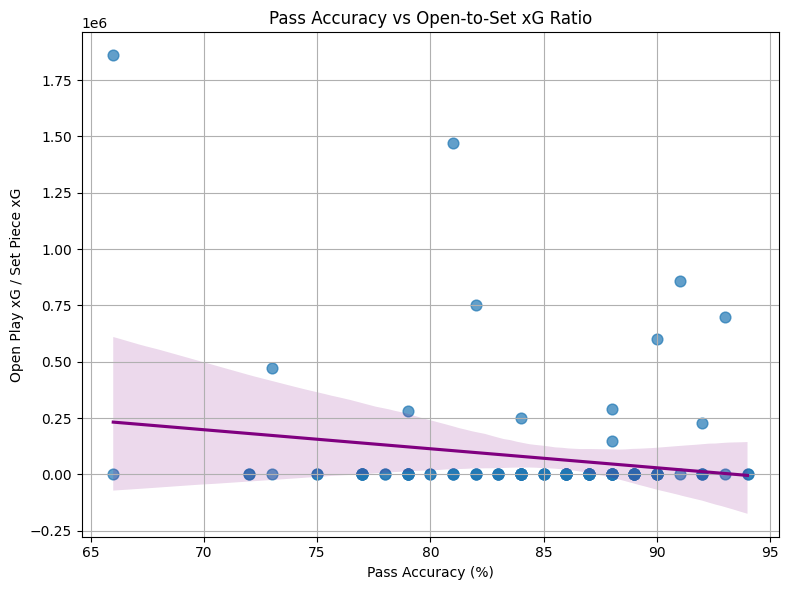

In [116]:
# --- PASS ACCURACY vs OPEN / SET PIECE xG RATIO ANALYSIS ---

# Create open-to-set xG ratio (prevent division by zero)
combined_df['open_vs_set_ratio'] = combined_df['open_play_xG'] / (combined_df['set_piece_xG'] + 1e-6)

# Pearson Correlation
from scipy.stats import pearsonr
r_ratio, p_ratio = pearsonr(combined_df['pass_accuracy'], combined_df['open_vs_set_ratio'])
print(f"📈 Pearson r = {r_ratio:.2f}")
print(f"📊 p-value = {p_ratio:.5f}")

# Linear Regression: open_vs_set_ratio ~ pass_accuracy
import statsmodels.api as sm

X = sm.add_constant(combined_df['pass_accuracy'])  # add intercept
y = combined_df['open_vs_set_ratio']

model = sm.OLS(y, X).fit()
print(model.summary())

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(
    x='pass_accuracy',
    y='open_vs_set_ratio',
    data=combined_df,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'purple'}
)
plt.xlabel('Pass Accuracy (%)')
plt.ylabel('Open Play xG / Set Piece xG')
plt.title('Pass Accuracy vs Open-to-Set xG Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()
